In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
heart_dataset= pd.read_csv('/Users/IMADN/Desktop/ML3/heart failur classification dataset.csv')
heart_dataset.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [3]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              293 non-null    float64
 10  sex                       299 non-null    object 
 11  smoking                   299 non-null    object 
 12  time                      292 non-null    float64
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

In [4]:
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [5]:
#removing null rows
heart_dataset = heart_dataset.dropna(how = 'any', axis = 0)
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
#removing unnamed column
heart_dataset.drop("Unnamed: 0",axis=1,inplace=True)
heart_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,Male,Yes,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140.0,Male,Yes,258.0,0
293,63.0,1,103,1,35,0,179000.00,0.9,136.0,Male,Yes,270.0,0
294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0


In [7]:
#Encoding categorical features 
heart_dataset['sex'].unique()
heart_dataset['smoking'].unique()

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
heart_dataset['sex']= enc.fit_transform(heart_dataset['sex'])
heart_dataset['smoking']= enc.fit_transform(heart_dataset['smoking'])
heart_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.0,1,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.0,0,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.0,1,1,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140.0,1,1,258.0,0
293,63.0,1,103,1,35,0,179000.00,0.9,136.0,1,1,270.0,0
294,62.0,0,61,1,38,1,155000.00,1.1,143.0,1,1,270.0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,0,0,278.0,0


In [8]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(heart_dataset)
heart_dataset1= scaler.transform(heart_dataset)   
heart_dataset1

array([[0.27272727, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 0.00364964,
        1.        ],
       [0.18181818, 1.        , 0.01122735, ..., 0.        , 0.00364964,
        1.        ],
       ...,
       [0.4       , 0.        , 0.00484818, ..., 1.        , 0.96350365,
        0.        ],
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.99270073,
        0.        ],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.        ]])

In [13]:
#train test split
features= heart_dataset[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
label= heart_dataset[['DEATH_EVENT']]
stratified = pd.DataFrame(label)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, stratify=stratified, random_state=0)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (228, 12)
y_train shape: (228, 1)
x_test shape: (58, 12)
y_test shape: (58, 1)


In [20]:
#evaluating the model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

C:\Users\IMADN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [21]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test, y_test)))

Training accuracy of the model is 0.80
Testing accuracy of the model is 0.83


In [22]:
predictions = gnb.predict(x_test)
print(predictions)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [23]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[38  8]
 [ 2 10]]


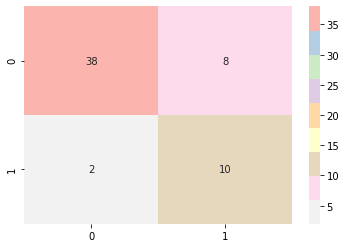

In [25]:
from seaborn import heatmap
heatmap(mat, cmap = "Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

In [26]:
#Support Vector Machine 
from sklearn.svm import SVC
svc= SVC(kernel = "linear")
svc.fit(x_train, y_train)

C:\Users\IMADN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [27]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.80
Testing accuracy of the model is 0.88


In [28]:
predictionsSVC = svc.predict(x_test)
print(predictionsSVC)
 
scoreSVC= accuracy_score(y_test, predictionsSVC)
print (scoreSVC)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1]
0.8793103448275862


In [29]:
from sklearn.neural_network import MLPClassifier
nnc= MLPClassifier(hidden_layer_sizes=(8), activation = "relu", max_iter=1000000)

In [30]:
from sklearn.metrics import confusion_matrix
matSVC= confusion_matrix(predictionsSVC, y_test)
print(matSVC)

[[39  6]
 [ 1 12]]


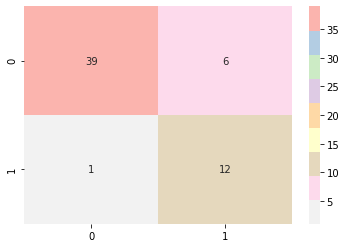

In [31]:
from seaborn import heatmap
heatmap(matSVC, cmap = "Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

In [36]:
#Neural Network (Multilayer Perceptron Classifier)
from sklearn.neural_network import MLPClassifier
nnc= MLPClassifier(hidden_layer_sizes=(8), activation = "relu", max_iter=1000000)
nnc.fit(x_train, y_train)

C:\Users\IMADN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=8, max_iter=1000000)

In [37]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.31
The Testing accuracy of the model is 0.31


In [38]:
predictionsNNC = nnc.predict(x_test)
print(predictionsNNC)

scoreNNC= accuracy_score(y_test, predictionsNNC)
print (scoreNNC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.3103448275862069


In [39]:
from sklearn.metrics import confusion_matrix
matNNC=confusion_matrix(predictionsNNC, y_test)
print(matNNC)

[[ 0  0]
 [40 18]]


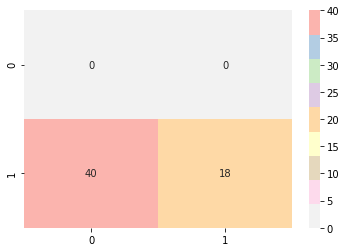

In [40]:
from seaborn import heatmap
heatmap(matNNC , cmap="Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)

<ipython-input-41-e8c9cede21d1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50)

In [42]:
print ("The training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print ( "The testing accuracy of the model is {:.2f}".format(rfc.score(x_test,y_test)))

The training accuracy of the model is 1.00
The testing accuracy of the model is 0.90


In [43]:
predictionsRFC = rfc.predict(x_test)
 
scoreRFC= accuracy_score(y_test, predictionsRFC)
print (scoreRFC)

0.896551724137931


In [44]:
from sklearn.metrics import confusion_matrix 
matRFC= confusion_matrix(predictionsRFC, y_test)
print(matRFC)

[[38  4]
 [ 2 14]]


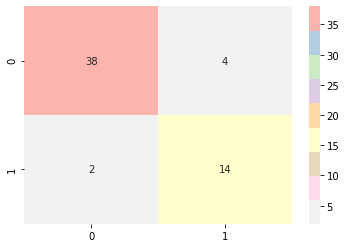

In [45]:
from seaborn import heatmap
heatmap(matRFC , cmap="Pastel1_r", xticklabels=['0' ,'1'], yticklabels=['0' ,'1'], annot=True)

In [46]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [47]:
y2 = heart_dataset.DEATH_EVENT

In [48]:
dataf=heart_dataset.drop('DEATH_EVENT',axis=1)
principal_components= pca.fit_transform(dataf)
print(principal_components)

[[ 1.51012033e+03  7.27876856e+03 -1.16226574e+02 -2.85481791e+00
   4.87005496e+00  2.24041514e+00]
 [-9.98499413e+04 -4.09489544e+02 -1.21011997e+02  1.44265161e+01
  -9.14546170e+00  5.52372985e+00]
 [-5.18499521e+04 -4.57133044e+02 -1.21258816e+02  2.28701761e+01
   3.00424052e+00 -2.20941726e+00]
 ...
 [-1.06849959e+05 -4.92891071e+02  1.42144343e+02 -2.83344654e+00
  -3.49508153e+00 -5.99039646e+00]
 [ 4.80150548e+05  1.35127722e+03  1.43533615e+02 -1.01516035e+01
   1.48615252e+01  2.05492176e+00]
 [-1.21849338e+05  1.86306932e+03  1.55004775e+02  4.29084562e+00
   8.99984527e+00 -2.12187481e+00]]


In [49]:
principal_df= pd.DataFrame(data=principal_components, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1510.120332,7278.768558,-116.226574,-2.854818,4.870055,2.240415
1,-99849.941342,-409.489544,-121.011997,14.426516,-9.145462,5.523730
2,-51849.952128,-457.133044,-121.258816,22.870176,3.004241,-2.209417
3,65150.056567,-439.013088,-122.610589,15.914046,-11.729975,18.736421
4,-57849.968874,-519.605050,-121.431082,-16.123275,-18.488296,3.767367


In [50]:
sum(pca.explained_variance_ratio_)

0.9999999997623413

In [51]:
x2=dataf

In [52]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)

In [53]:
#Support Vector Machine (2ndtime)
from sklearn.svm import SVC
svc2 = SVC(kernel = "linear")
svc2.fit(x2_train, y2_train)

SVC(kernel='linear')

In [54]:
print("Training accuracy of the model is {:.2f}".format(svc2.score(x2_train, y2_train)))
print("Testing accuracy of the model is {:.2f}".format(svc2.score(x2_test, y2_test)))

Training accuracy of the model is 0.81
Testing accuracy of the model is 0.71


In [55]:
predictionsSVC2 = svc2.predict(x2_test)
print(predictionsSVC2)

scoreSVC2= accuracy_score(y2_test, predictionsSVC2)
print (scoreSVC2)

[1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
0.7068965517241379


In [56]:
from sklearn.metrics import confusion_matrix
matSVC2=confusion_matrix(predictionsSVC2, y2_test)
print(matSVC2)

[[36 17]
 [ 0  5]]


In [57]:
#Neural Network (MLPClassifier) (2ndtime)
from sklearn.neural_network import MLPClassifier
nnc2= MLPClassifier(hidden_layer_sizes=(8), activation = "relu", max_iter=1000000)

In [58]:
nnc2.fit(x2_train, y2_train)

MLPClassifier(hidden_layer_sizes=8, max_iter=1000000)

In [59]:
print("Training accuracy of the model is {:.2f}".format(nnc2.score(x2_train, y2_train)))
print("Testing accuracy of the model is {:.2f}".format(nnc2.score(x2_test, y2_test)))

Training accuracy of the model is 0.70
Testing accuracy of the model is 0.62


In [60]:
predictionsNNC2 = nnc2.predict(x2_test)
print(predictionsNNC2)
 
scoreNNC2= accuracy_score(y2_test, predictionsNNC2)
print (scoreNNC2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.6206896551724138


In [61]:
#Random Forest (2ndtime)
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators = 50)
rfc2.fit(x2_train, y2_train)

RandomForestClassifier(n_estimators=50)

In [62]:
print ("The training accuracy of the model is {:.2f}".format(rfc2.score(x2_train, y2_train)))
print ( "The testing accuracy of the model is {:.2f}".format(rfc2.score(x2_test,y2_test)))

The training accuracy of the model is 1.00
The testing accuracy of the model is 0.83


In [63]:
predictionsRFC2 = rfc2.predict(x2_test)
scoreRFC2= accuracy_score(y2_test, predictionsRFC2)
print (scoreRFC2)

0.8275862068965517


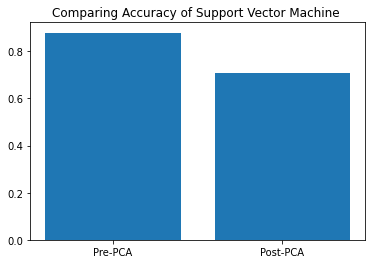

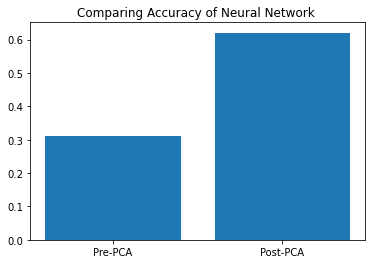

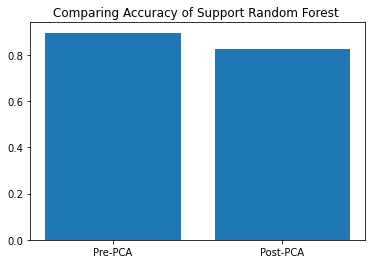

In [64]:
#the accuracy of the pre-PCA and post-PCA results
plt.bar(['Pre-PCA', 'Post-PCA'],[scoreSVC, scoreSVC2])
plt.title('Comparing Accuracy of Support Vector Machine ')
plt.show()
 
plt.bar(['Pre-PCA', 'Post-PCA'],[scoreNNC, scoreNNC2])
plt.title('Comparing Accuracy of Neural Network ')
plt.show()
 
plt.bar(['Pre-PCA', 'Post-PCA'],[scoreRFC, scoreRFC2])
plt.title('Comparing Accuracy of Support Random Forest ')
plt.show()